In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('homework_data.csv')
data.head(3)

,ДЗ в базе,всего ДЗ,сдали ДЗ,% сдачи ДЗ,средний результат в %,оценили ДЗ,рейтинг ДЗ,% оценивших,light всего ДЗ,light начали ДЗ,...,standard сдали ДЗ,standard % сдачи,standard ср. результат,hard всего ДЗ,hard начали ДЗ,hard сдали ДЗ,hard % сдачи,hard ср. результат,ср. время решения,80 процентиль времени решения ДЗ
0,Алгоритмы сортировки. Решение №1. Легкое,46,8.0,"17,4%","62,5%",NaN,NaN,NaN,45.0,8.0,...,1.0,"100,00%","50,00%",NaN,NaN,NaN,NaN,NaN,18:27:26,0:50:38
1,Алгоритмы сортировки. Решение №1. Среднее,423,162.0,"38,3%","66,0%",51.0,4.823529,"31,48%",1.0,1.0,...,156.0,"37,41%","65,81%",5.0,5.0,5.0,"100,00%","76,67%",5:15:12,2:32:33
2,Алгоритмы сортировки. Решение №1. Тяжелое,383,221.0,"57,7%","65,3%",78.0,4.756410,"35,29%",1.0,1.0,...,NaN,NaN,NaN,382.0,231.0,220.0,"57,59%","65,51%",14:45:28,10:23:24


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ДЗ в базе                         99 non-null     object 
 1   всего ДЗ                          99 non-null     int64  
 2   сдали ДЗ                          96 non-null     float64
 3   % сдачи ДЗ                        96 non-null     object 
 4   средний результат в %             96 non-null     object 
 5   оценили ДЗ                        88 non-null     float64
 6   рейтинг ДЗ                        88 non-null     float64
 7   % оценивших                       88 non-null     object 
 8   light всего ДЗ                    79 non-null     float64
 9   light начали ДЗ                   78 non-null     float64
 10  light сдали ДЗ                    78 non-null     float64
 11  light % сдачи                     78 non-null     object 
 12  light ср. 

In [4]:
data.describe()

,всего ДЗ,сдали ДЗ,оценили ДЗ,рейтинг ДЗ,light всего ДЗ,light начали ДЗ,light сдали ДЗ,standard всего ДЗ,standard начали ДЗ,standard сдали ДЗ,hard всего ДЗ,hard начали ДЗ,hard сдали ДЗ
count,99.000000,96.000000,88.000000,88.000000,79.000000,78.000000,78.000000,91.000000,90.000000,88.000000,78.000000,77.000000,77.000000
mean,498.212121,307.343750,136.000000,4.700923,33.063291,14.423077,11.769231,266.714286,164.811111,148.556818,287.692308,214.714286,201.480519
std,439.314686,293.230386,131.960548,0.251749,32.082163,15.807707,13.462717,262.009342,175.735366,154.589620,226.484729,169.931399,160.553697
min,12.000000,2.000000,2.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000,1.000000
25%,180.000000,85.000000,43.000000,4.627907,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,6.500000,6.000000,6.000000
50%,360.000000,221.000000,86.000000,4.754941,25.000000,7.000000,7.000000,177.000000,105.000000,93.000000,346.000000,241.000000,230.000000
75%,567.500000,349.000000,252.000000,4.888889,64.000000,25.250000,17.000000,456.000000,286.000000,264.000000,458.000000,380.000000,336.000000
max,1421.000000,988.000000,441.000000,4.960784,82.000000,48.000000,43.000000,675.000000,516.000000,478.000000,664.000000,479.000000,467.000000


In [5]:
# функция для удаления знаков ',' и '%' и преобразования в числовой тип данных
def convert_to_numeric(value):
    try:
        return pd.to_numeric(value.replace(',', '.').replace('%', ''), errors='coerce')
    except ValueError:
        return None

# удаление строк с пропущенными данными в столбиках, нужных для будущего результата
data = data.dropna(subset=['% сдачи ДЗ', 'средний результат в %', '80 процентиль времени решения ДЗ'])

data['80 процентиль времени решения ДЗ'] = pd.to_timedelta(data['80 процентиль времени решения ДЗ']).dt.total_seconds() / 60 / 60
data = data.rename(columns={'80 процентиль времени решения ДЗ': '80 процентиль времени решения ДЗ в часах'})

data['% сдачи ДЗ'] = data['% сдачи ДЗ'].apply(convert_to_numeric)
data['средний результат в %'] = data['средний результат в %'].apply(convert_to_numeric)

In [6]:
# в датасет беру только нужные метрики, также использую 80 процентиль времени решения ДЗ, 
# чтобы избавится от сильных выбросов
filtered_data = data.copy()[['ДЗ в базе', 'сдали ДЗ', '80 процентиль времени решения ДЗ в часах', '% сдачи ДЗ', 'средний результат в %']]

# для группировки по 3 уровням сложности ДЗ эти уровни убираются из названий, чтобы они стали идентичными
filtered_data['ДЗ в базе'] = filtered_data['ДЗ в базе'].str.replace(r'\s*(?:Легкое|Среднее|Тяжелое)\s*', '', regex=True)

# чтобы более правильно взять статистику будут использоваться взвешенные средние
weighted_avg = lambda x: np.average(x, weights=filtered_data.loc[x.index, '% сдачи ДЗ'])

groupby_traсk = filtered_data.groupby('ДЗ в базе').agg({
    '% сдачи ДЗ': 'mean',
    '80 процентиль времени решения ДЗ в часах': weighted_avg,
    'средний результат в %': weighted_avg
}).reset_index()

groupby_traсk.head(5)

,ДЗ в базе,% сдачи ДЗ,80 процентиль времени решения ДЗ в часах,средний результат в %
0,Автоматизация процессов. Решение №11.,50.100000,50.998552,45.578177
1,Алгоритмы и структуры данных в C++.,62.500000,40.155611,73.945120
2,Алгоритмы поиска. Решение №2.,27.900000,36.083426,52.906571
3,Алгоритмы сортировки. Решение №1.,37.800000,6.274818,65.106790
4,Анализ алгоритмов. Решение №7.,53.833333,2.355677,75.706502


In [7]:
groupby_traсk.describe()

,% сдачи ДЗ,80 процентиль времени решения ДЗ в часах,средний результат в %
count,32.000000,32.000000,32.000000
mean,51.123958,27.235417,67.478764
std,12.335037,22.066960,11.449182
min,27.900000,2.355677,45.578177
25%,43.200000,8.581823,60.250463
50%,50.100000,22.071975,73.945120
75%,60.950000,40.155611,77.414341
max,73.833333,69.290915,78.930023


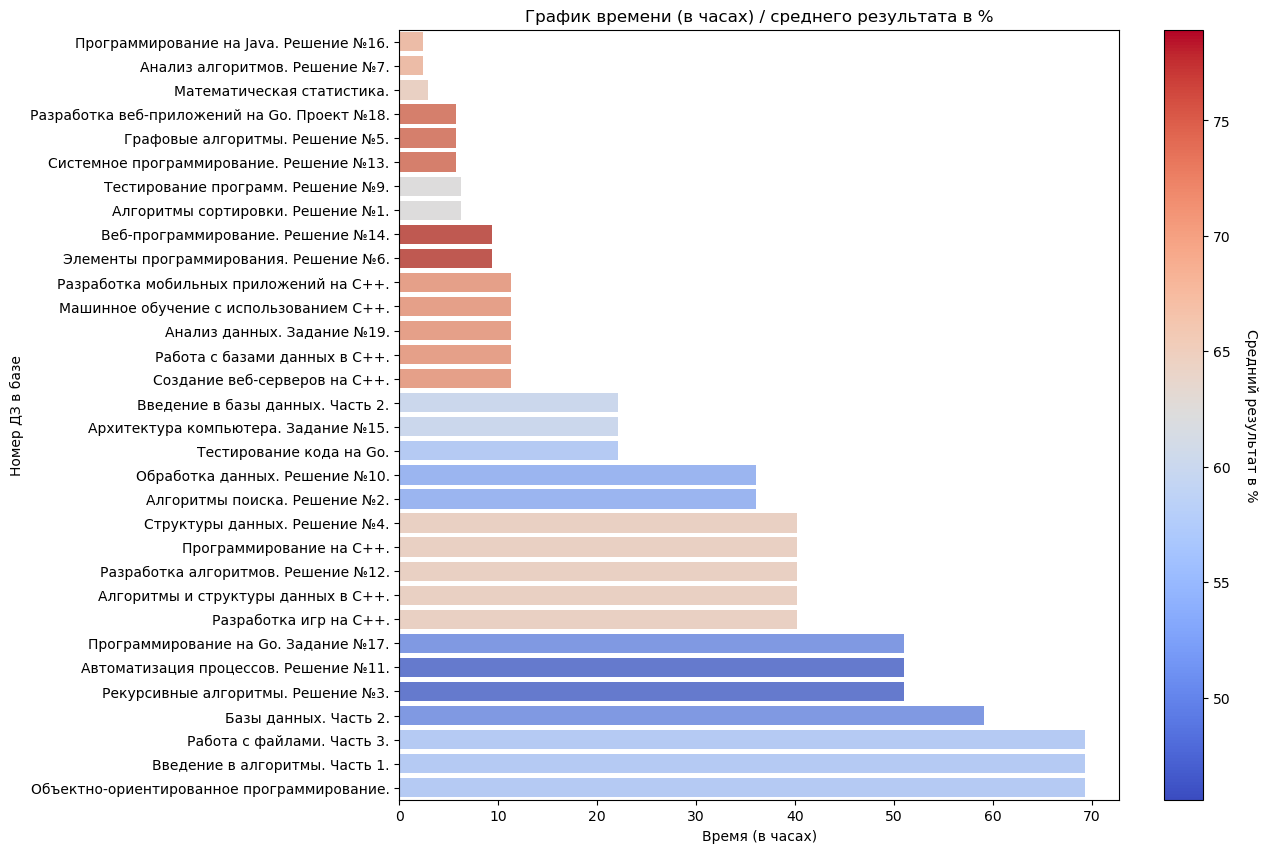

In [8]:
groupby_traсk_copy = groupby_traсk.copy()
# сортировка по времени, чтобы график выглядел приятно
groupby_traсk_copy = groupby_traсk_copy.sort_values(by='80 процентиль времени решения ДЗ в часах')

plt.figure(figsize=(18, 10))
plt.subplots_adjust(left=0.4)

# нормализация для удобных меток на цветовой шкале справа от графика
norm = plt.Normalize(groupby_traсk_copy['средний результат в %'].min(), groupby_traсk_copy['средний результат в %'].max())
sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=norm)

# цвет кажодой линии зависит от среднего результата
ax = sns.barplot(x='80 процентиль времени решения ДЗ в часах', y='ДЗ в базе', data=groupby_traсk_copy, palette='coolwarm', hue='средний результат в %', dodge=False)
    
plt.title('График времени (в часах) / среднего результата в %')
plt.xlabel('Время (в часах)')
plt.ylabel('Номер ДЗ в базе')
ax.legend().set_visible(False)

cbar = ax.figure.colorbar(sm, ax=ax)
cbar.set_label('Средний результат в %', rotation=270, labelpad=20)

# при необходимости сохранить график
# plt.savefig('output_plot.png', dpi=300, bbox_inches='tight')

plt.show()

**Можно заметить, что с увеличением времени уменьшается средний результат в процентах**

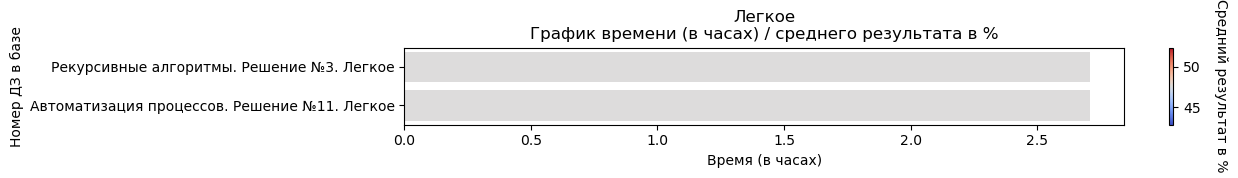

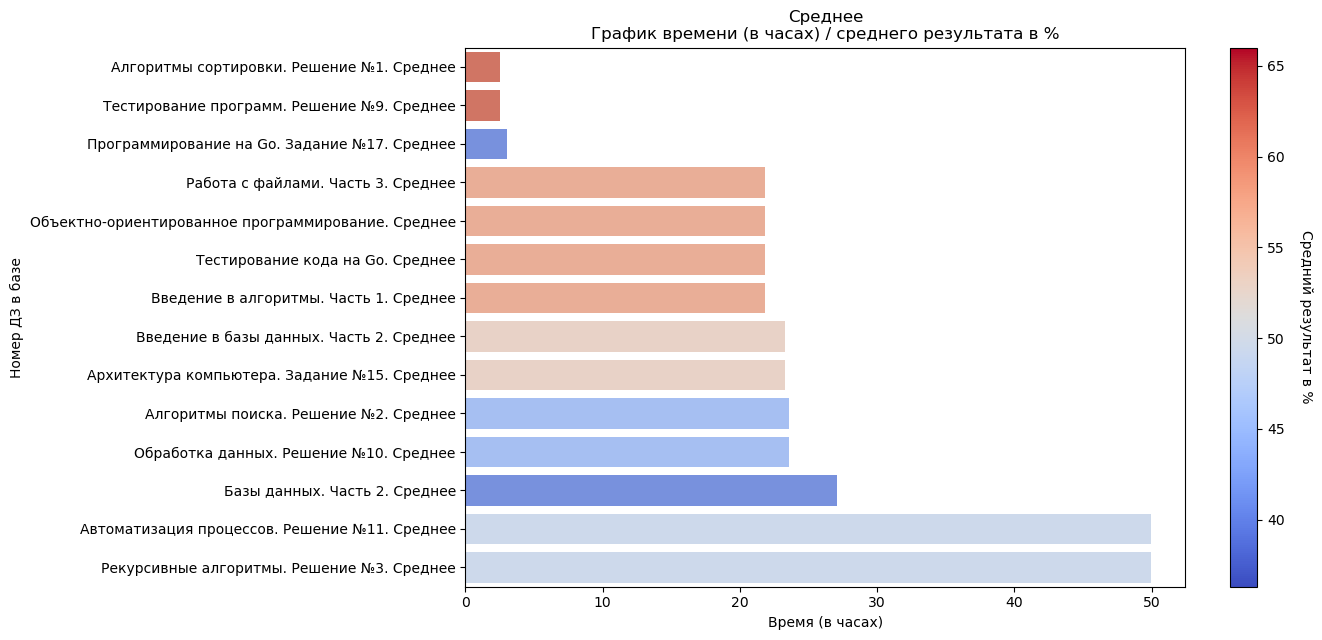

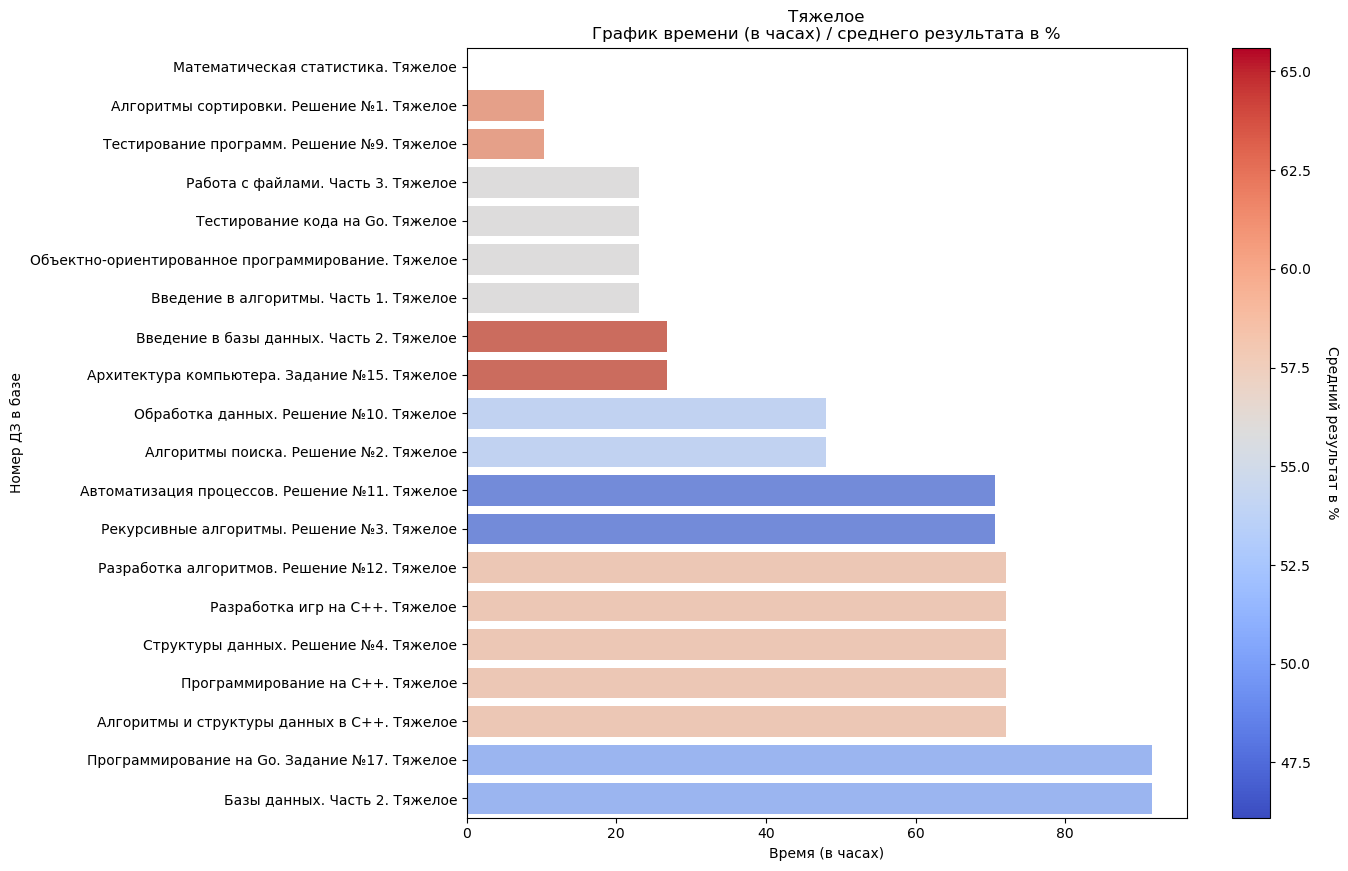

In [11]:
data_copy = data.copy()
# максимальное время ограничено для более понятной визуализации
data_copy['80 процентиль времени решения ДЗ в часах'] = data_copy['80 процентиль времени решения ДЗ в часах'].apply(lambda x: min(x, 6000))
# для более чательного анализа будем рассматривать только те ДЗ, которые уже набрали 20 и более решений
# искать проблемы нужно в задачах, в которых средний результат ниже среднего
data_sort_copy = data_copy[(data_copy['сдали ДЗ'] >= 20 ) & (data_copy['средний результат в %'] < 67.038589)]
data_sort_copy = data_sort_copy.sort_values(by='80 процентиль времени решения ДЗ в часах')

# построение графика для каждого уровня сложности ДЗ
for track in ['Легкое', 'Среднее', 'Тяжелое']:
    
    data_track = data_sort_copy[data_sort_copy['ДЗ в базе'].str.contains(track)]
    
    # размер графика зависит от кол-ва найденных строк
    plt.figure(figsize=(18, min(10, data_track.shape[0] * 0.5)))
    plt.subplots_adjust(left=0.4)

    norm = plt.Normalize(data_track['средний результат в %'].min(), data_track['средний результат в %'].max())
    sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=norm)
    
    ax = sns.barplot(x='80 процентиль времени решения ДЗ в часах', y='ДЗ в базе', data=data_track, palette='coolwarm', hue='средний результат в %', dodge=False)

    plt.title(f'{track}\nГрафик времени (в часах) / среднего результата в %')
    plt.xlabel('Время (в часах)')
    plt.ylabel('Номер ДЗ в базе')
    ax.legend().set_visible(False)
    
    cbar = ax.figure.colorbar(sm, ax=ax)
    cbar.set_label('Средний результат в %', rotation=270, labelpad=20)

    # при необходимости сохранить график
    # plt.savefig(f'output_plot_{track}.png', dpi=300, bbox_inches='tight')

    plt.show()

**"Базы данных. Часть 2" и "Введение в алгоритмы. Часть 1" заняли низкие позиции в Тяжелом и Среднем уровне сложности. Рассмотрим их.**

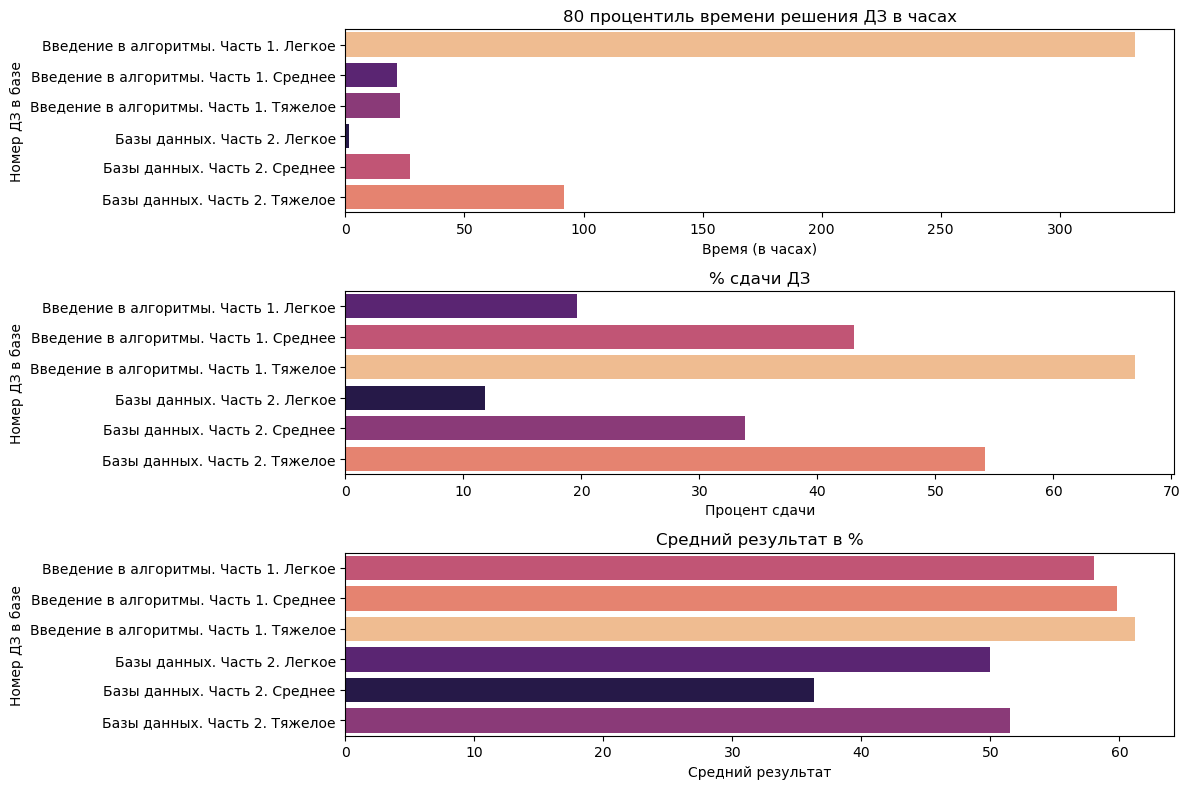

In [10]:
# в ячеке код для создания трех графиков по каждой метрике, цвет зависит от среднего результата

data_copy = data.copy()
# ДЗ выбирается по вхождению строки в названии
data_sort_copy = data_copy[data_copy['ДЗ в базе'].str.contains('Базы данных. Часть 2|алгоритмы. Часть 1')]

fig, axes = plt.subplots(nrows=3, figsize=(12, 8))

sns.barplot(x='80 процентиль времени решения ДЗ в часах', y='ДЗ в базе', hue='80 процентиль времени решения ДЗ в часах', data=data_sort_copy, palette='magma', dodge=False, ax=axes[0])
axes[0].set_title('80 процентиль времени решения ДЗ в часах')
axes[0].set_xlabel('Время (в часах)')
axes[0].set_ylabel('Номер ДЗ в базе')
axes[0].legend().set_visible(False)

sns.barplot(x='% сдачи ДЗ', y='ДЗ в базе', palette='magma', hue='% сдачи ДЗ', data=data_sort_copy, dodge=False, ax=axes[1])
axes[1].set_title('% сдачи ДЗ')
axes[1].set_xlabel('Процент сдачи')
axes[1].set_ylabel('Номер ДЗ в базе')
axes[1].legend().set_visible(False)

sns.barplot(x='средний результат в %', y='ДЗ в базе', hue='средний результат в %', palette='magma', data=data_sort_copy, dodge=False, ax=axes[2])
axes[2].set_title('Средний результат в %')
axes[2].set_xlabel('Средний результат')
axes[2].set_ylabel('Номер ДЗ в базе')
axes[2].legend().set_visible(False)

plt.tight_layout()

plt.show()

**Можно заметить сильное отличие между Введением в алгоритмы на легком уровне и остальными ДЗ на первом графике (времени)
Также процент сдачи ДЗ Базы данных на Легком уровне очень низкий**